In [99]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [85]:
df=pd.read_csv("bbc-text.csv")
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [10]:
cp=df['text'][0]
cp

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

<Axes: xlabel='category'>

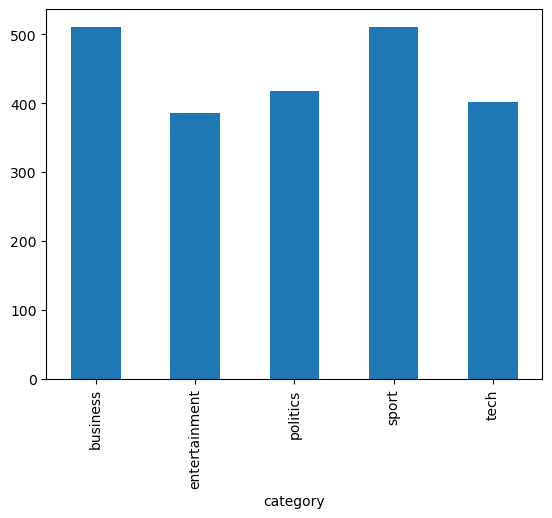

In [92]:
po=df.groupby('category').text.count().plot.bar()
po

In [14]:
words=stopwords.words('english')

In [16]:
stemmer=PorterStemmer()

In [46]:
cp

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [51]:
sp=[" ".join(stemmer.stem(x) for x in cp.split())]

In [93]:
df['updated']=df['text'].apply(lambda x:" ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]"," ",x).split() if i not in words]).lower())

In [94]:
df

,category,text,updated
0,tech,tv future in the hands of viewers with home th...,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelv raid box offic ocean twelv crime c...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,car pull us retail figur us retail sale fell j...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveil immigr polici ex chatshow host r...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announc new glasgow concert us band rem an...
2223,politics,how political squabbles snowball it s become c...,polit squabbl snowbal becom commonplac argu bl...


In [98]:
# training the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
vectorizer=TfidfVectorizer
x=df['text']
y=df['category']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)



1079    ore costs hit global steel firms shares in ste...
2151    lions blow to world cup stars british and iris...
30      royal couple watch nation s mood prince charle...
1334    clarke defends terror detentions the home secr...
984     music mogul fuller sells company pop idol supr...
                              ...                        
919     eu referendum could cost £80m  it could cost £...
1164    cactus diet deal for phytopharm a slimming aid...
500     global digital divide  narrowing  the  digital...
421     spurs to sign iceland u21 star tottenham are p...
1829    wipro beats forecasts once again wipro  india ...
Name: text, Length: 1668, dtype: object